In [1]:
import jax.numpy as jnp
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from tqdm import tqdm_notebook
from qmp.qmp_functions import fit_Q, fit_Q_perm, rearrange_Q_B,rearrange_Q
from qmp.sample_qmp_functions import PR_loop_B, approx_PR_B
from qmp.utils.bivariate_copula import norm_logbicop_approx


# Setup Colours

In [2]:
palette = sns.color_palette("gist_earth", 6)
color_codes = ['1', '2','3','4','5','6']
c = lambda x: palette[color_codes.index(x)]


# Simulation plots

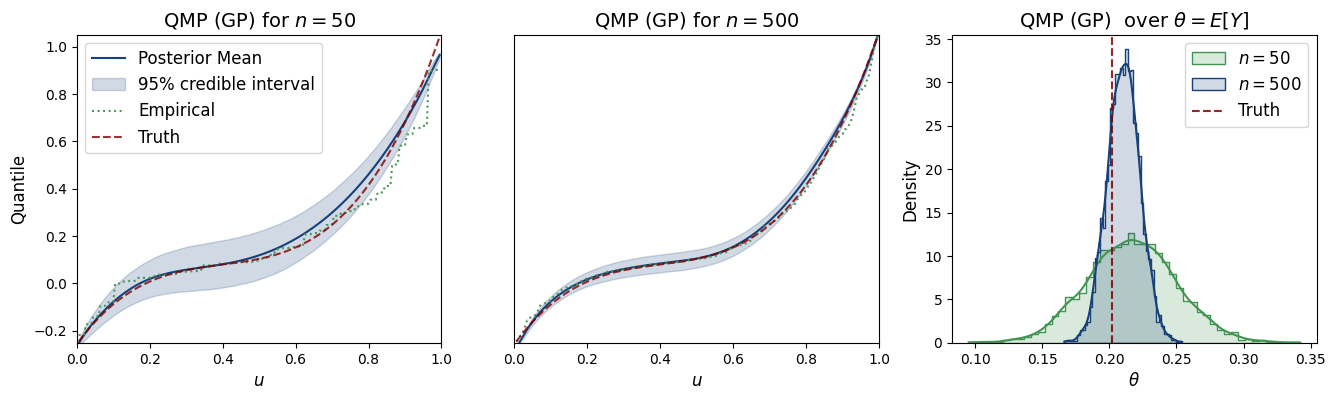

In [3]:
#Load references
u_plot = np.load('plot_data/u_plot.npy')
du = u_plot[1]- u_plot[0]
Q_truth = np.load("plot_data/Q_truth.npy")

f=plt.figure(figsize = (16,4))

plt.subplot(1,3,1)
#Load data
n = 50
Q_pr_gp_rearr = np.load("plot_data/Q_pr_gp_rearr_n{}.npy".format(n))
y = np.load('plot_data/y_n{}.npy'.format(n))

mean = np.mean(Q_pr_gp_rearr,axis = 0)
low = np.quantile(Q_pr_gp_rearr,axis = 0, q = 0.025)
hi = np.quantile(Q_pr_gp_rearr,axis= 0, q = 0.975)

plt.plot(u_plot,mean, color = c('1'),alpha = 1., label = 'Posterior Mean')
plt.fill_between(u_plot,low, hi, alpha = 0.2,color = c('1'), label = '95% credible interval')
sns.lineplot(x=u_plot, y= np.quantile(y,u_plot,method = 'inverted_cdf'),label = 'Empirical',color = c('3'), ls = ':', alpha = 0.95)
plt.plot(u_plot,Q_truth, color = 'maroon', label = 'Truth',alpha = 0.8, ls = '--')
plt.xlim(0,1)
plt.ylim(-0.25,1.05)
plt.title(r'QMP (GP) for $n=${}'.format(n),fontsize = 14)
plt.ylabel(r'Quantile',fontsize = 12)
plt.xlabel(r'$u$', fontsize = 12)
plt.legend(fontsize = 12)

plt.subplot(1,3,2)
plt.yticks([], [])
#Load data
n = 500
Q_pr_gp_rearr = np.load("plot_data/Q_pr_gp_rearr_n{}.npy".format(n))
y = np.load('plot_data/y_n{}.npy'.format(n))

y = np.load('plot_data/y_n{}.npy'.format(n))
u_plot = np.load('plot_data/u_plot.npy')


mean = np.mean(Q_pr_gp_rearr,axis = 0)
low = np.quantile(Q_pr_gp_rearr,axis = 0, q = 0.025)
hi = np.quantile(Q_pr_gp_rearr,axis= 0, q = 0.975)

plt.plot(u_plot,mean, color = c('1'),alpha = 1.)
plt.fill_between(u_plot,low, hi, alpha = 0.2,color = c('1'))
sns.lineplot(x=u_plot, y= np.quantile(y,u_plot,method = 'inverted_cdf'),color = c('3'), ls = ':', alpha = 0.95)
plt.plot(u_plot,Q_truth, color = 'maroon', label = 'Truth',alpha = 0.8,ls = '--')
plt.xlim(0,1)
plt.ylim(-0.25,1.05)
plt.title(r'QMP (GP) for $n=${}'.format(n),fontsize = 14)
plt.xlabel(r'$u$', fontsize = 12)

plt.subplot(1,3,3)
n1 = 50
n2 = 500
Q_pr_gp_rearr_small = np.load("plot_data/Q_pr_gp_rearr_n{}.npy".format(n1))
Q_pr_gp_rearr_big = np.load("plot_data/Q_pr_gp_rearr_n{}.npy".format(n2))

mean_small = np.sum(Q_pr_gp_rearr_small,axis = 1)*du
mean_big = np.sum(Q_pr_gp_rearr_big,axis = 1)*du

sns.histplot(mean_small,label = r'$n =${}'.format(n1),alpha  = 0.2, stat = 'density', kde = True,element="step",color = c('3'))
sns.histplot(mean_big,label = r'$n =${}'.format(n2),alpha = 0.2, stat = 'density', kde = True,element="step",color = c('1'))
plt.axvline(np.sum(Q_truth)*du,label = 'Truth',color = 'maroon',alpha = 0.85, ls = '--')
plt.title(r'QMP (GP)  over $\theta = E[Y]$',fontsize = 14)
plt.xlabel(r'$\theta$',fontsize = 12)
plt.ylabel('Density',fontsize = 12)
plt.legend(fontsize = 12)
f.savefig('sim.pdf', bbox_inches='tight')


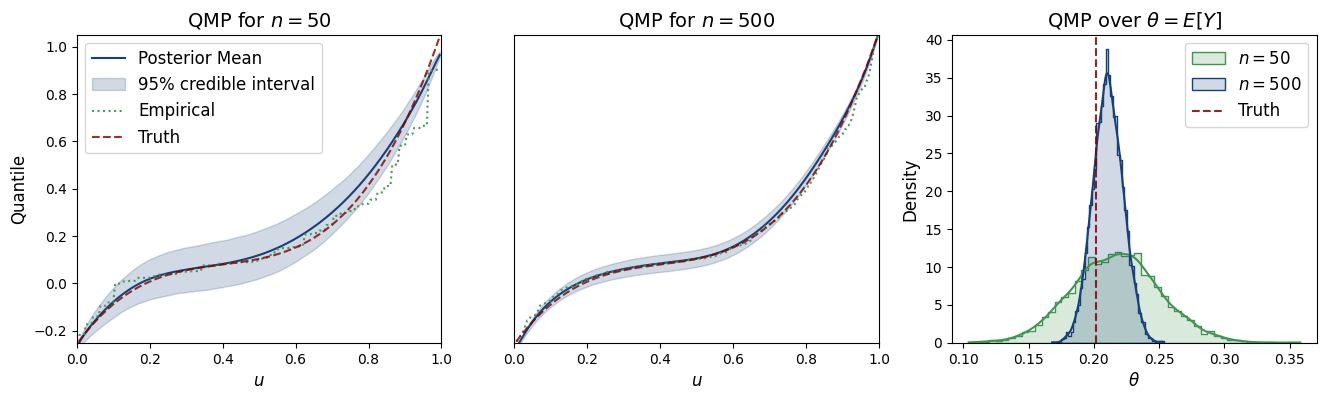

In [4]:
#Load references
u_plot = np.load('plot_data/u_plot.npy')
du = u_plot[1]- u_plot[0]
Q_truth = np.load("plot_data/Q_truth.npy")

f=plt.figure(figsize = (16,4))

plt.subplot(1,3,1)
#Load data
n = 50
Q_pr_rearr = np.load("plot_data/Q_pr_rearr_n{}.npy".format(n))
y = np.load('plot_data/y_n{}.npy'.format(n))

mean = np.mean(Q_pr_rearr,axis = 0)
low = np.quantile(Q_pr_rearr,axis = 0, q = 0.025)
hi = np.quantile(Q_pr_rearr,axis= 0, q = 0.975)

plt.plot(u_plot,mean, color = c('1'),alpha = 1., label = 'Posterior Mean')
plt.fill_between(u_plot,low, hi, alpha = 0.2,color = c('1'), label = '95% credible interval')
sns.lineplot(x=u_plot, y= np.quantile(y,u_plot,method = 'inverted_cdf'),label = 'Empirical',color = c('3'), ls = ':', alpha = 0.95)
plt.plot(u_plot,Q_truth, color = 'maroon', label = 'Truth',alpha = 0.8, ls = '--')
plt.xlim(0,1)
plt.ylim(-0.25,1.05)
plt.title(r'QMP for $n=${}'.format(n),fontsize = 14)
plt.ylabel(r'Quantile',fontsize = 12)
plt.xlabel(r'$u$', fontsize = 12)
plt.legend(fontsize = 12)

plt.subplot(1,3,2)
plt.yticks([], [])
#Load data
n = 500
Q_pr_rearr = np.load("plot_data/Q_pr_rearr_n{}.npy".format(n))
y = np.load('plot_data/y_n{}.npy'.format(n))

y = np.load('plot_data/y_n{}.npy'.format(n))
u_plot = np.load('plot_data/u_plot.npy')


mean = np.mean(Q_pr_rearr,axis = 0)
low = np.quantile(Q_pr_rearr,axis = 0, q = 0.025)
hi = np.quantile(Q_pr_rearr,axis= 0, q = 0.975)

plt.plot(u_plot,mean, color = c('1'),alpha = 1.)
plt.fill_between(u_plot,low, hi, alpha = 0.2,color = c('1'))
sns.lineplot(x=u_plot, y= np.quantile(y,u_plot,method = 'inverted_cdf'),color = c('3'), ls = ':', alpha = 0.95)
plt.plot(u_plot,Q_truth, color = 'maroon', label = 'Truth',alpha = 0.8,ls = '--')
plt.xlim(0,1)
plt.ylim(-0.25,1.05)
plt.title(r'QMP for $n=${}'.format(n),fontsize = 14)
plt.xlabel(r'$u$', fontsize = 12)

plt.subplot(1,3,3)
n1 = 50
n2 = 500
Q_pr_rearr_small = np.load("plot_data/Q_pr_rearr_n{}.npy".format(n1))
Q_pr_rearr_big = np.load("plot_data/Q_pr_rearr_n{}.npy".format(n2))

mean_small = np.sum(Q_pr_rearr_small,axis = 1)*du
mean_big = np.sum(Q_pr_rearr_big,axis = 1)*du

sns.histplot(mean_small,label = r'$n =${}'.format(n1),alpha  = 0.2, stat = 'density', kde = True,element="step",color = c('3'))
sns.histplot(mean_big,label = r'$n =${}'.format(n2),alpha = 0.2, stat = 'density', kde = True,element="step",color = c('1'))
plt.axvline(np.sum(Q_truth)*du,label = 'Truth',color = 'maroon',alpha = 0.85, ls = '--')
plt.title(r'QMP over $\theta = E[Y]$',fontsize = 14)
plt.xlabel(r'$\theta$',fontsize = 12)
plt.ylabel('Density',fontsize = 12)
plt.legend(fontsize = 12)
f.savefig('sim_exact.pdf', bbox_inches='tight')
#print(np.mean(mean_big))

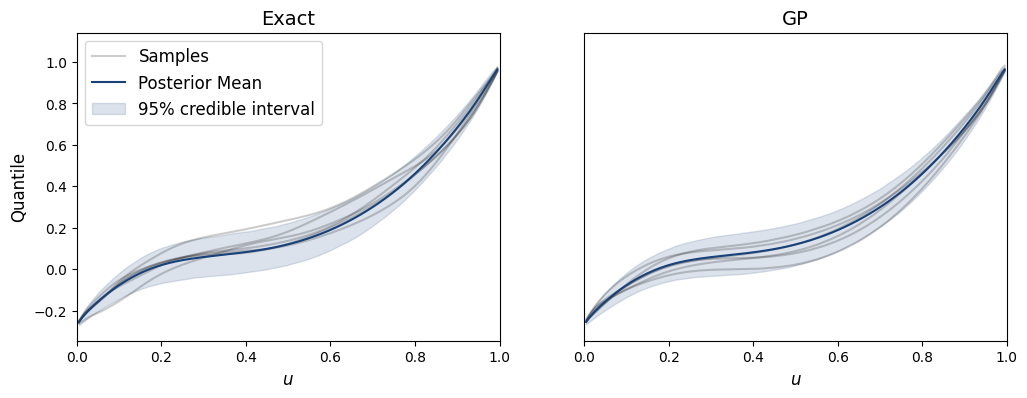

In [5]:
# Plot samples
n = 50
Q_pr_gp_rearr = np.load("plot_data/Q_pr_gp_rearr_n{}.npy".format(n))
Q_pr_rearr = np.load("plot_data/Q_pr_rearr_n{}.npy".format(n))
y = np.load('plot_data/y_n{}.npy'.format(n))

#Make plots
f = plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(u_plot,Q_pr_rearr[-1],color = 'k',alpha = 0.2,label = 'Samples')
for j in range(5):
    plt.plot(u_plot,Q_pr_rearr[j],color = 'k',alpha = 0.2)

plt.plot(u_plot,np.mean(Q_pr_rearr,axis = 0), color = c('1'),alpha = 1., label = 'Posterior Mean')
low = np.quantile(Q_pr_rearr,axis = 0, q = 0.025)
hi = np.quantile(Q_pr_rearr,axis= 0, q = 0.975)
plt.fill_between(u_plot,low, hi, alpha = 0.15,color = c('1'), label = '95% credible interval')
plt.legend(fontsize = 12)
plt.xlim(0,1)
plt.ylim(np.min(Q_truth)-0.1, np.max(Q_truth)+0.1)
plt.title(r'Exact',fontsize = 14)
plt.ylabel(r'Quantile',fontsize = 12)
plt.xlabel(r'$u$', fontsize = 12)

plt.subplot(1,2,2)
plt.yticks([], [])

plt.plot(u_plot,Q_pr_gp_rearr[-1],color = 'k',alpha = 0.2,label = 'Samples')
for j in range(5):
    plt.plot(u_plot,Q_pr_gp_rearr[j],color = 'k',alpha = 0.2)

plt.plot(u_plot,np.mean(Q_pr_gp_rearr,axis = 0), color = c('1'),alpha = 1., label = 'Posterior Mean')
low = np.quantile(Q_pr_gp_rearr,axis = 0, q = 0.025)
hi = np.quantile(Q_pr_gp_rearr,axis= 0, q = 0.975)
plt.fill_between(u_plot,low, hi, alpha = 0.15,color = c('1'), label = '95% credible interval')
plt.xlim(0,1)
plt.ylim(np.min(Q_truth)-0.1, np.max(Q_truth)+0.1)
plt.xlabel(r'$u$', fontsize = 12)
plt.title(r'GP',fontsize = 14)
f.savefig('sim_samples.pdf', bbox_inches='tight')

# Paper plots

In [6]:
# Warning: slow!
a = np.sqrt(12)*np.std(y)

#grid-based
import jax
seed = 252
B = 5000
key = jax.random.key(seed)
key = jax.random.split(key, B)
T = 5000

du = 0.005
u_plot = jnp.arange(du, 1, du)
n_plot = len(u_plot)

#Q_plot = (2*(u_plot-0.5))**3
Q_plot = Q_truth
n = 10

%time Q_pr = PR_loop_B(key, Q_plot,a,0.5,0.5,n,T)
%time Q_pr2 = PR_loop_B(key, Q_plot,a,0.5,1.5,n,T)
%time Q_gp_smooth = approx_PR_B(2312,Q_plot,a,0.5,0.5,n,B)

CPU times: user 1min 33s, sys: 1.91 s, total: 1min 35s
Wall time: 15.2 s
CPU times: user 1min 34s, sys: 1.98 s, total: 1min 36s
Wall time: 15.6 s
CPU times: user 340 ms, sys: 111 ms, total: 451 ms
Wall time: 107 ms


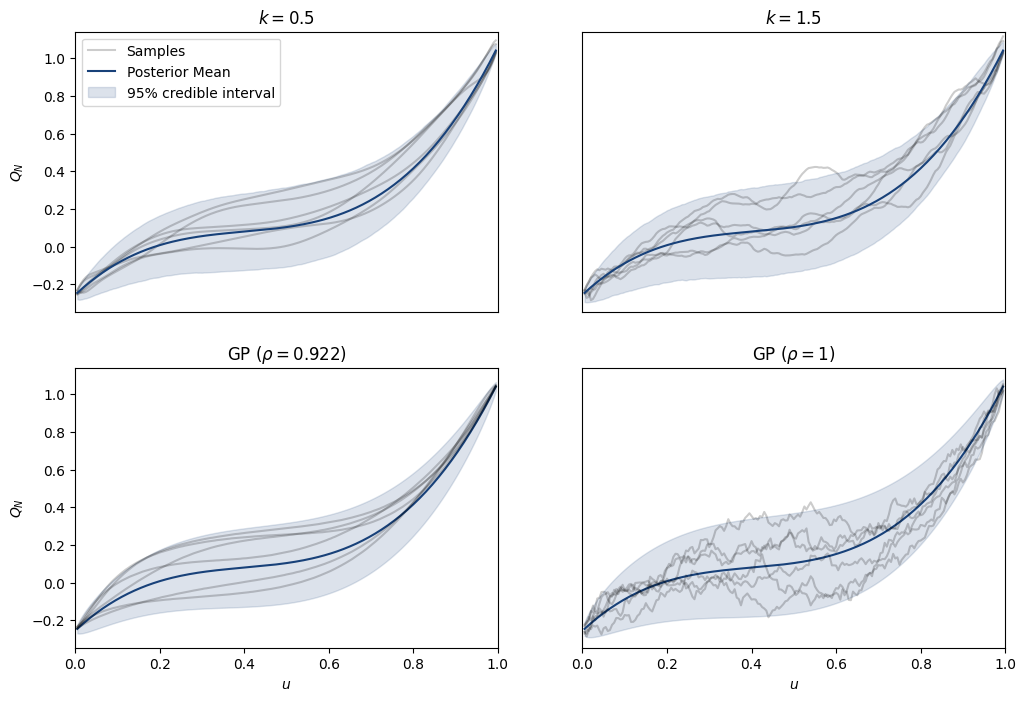

In [7]:
f = plt.figure(figsize = (12,8))
plt.subplot(2,2,1)
plt.xticks([], [])
plt.plot(u_plot,Q_pr[-1],color = 'k',alpha = 0.2,label = 'Samples')
for j in range(5):
    plt.plot(u_plot,Q_pr[j],color = 'k',alpha = 0.2)

plt.plot(u_plot,Q_plot, color =c('1'),alpha = 1., label = 'Posterior Mean')
low = np.quantile(Q_pr,axis = 0, q = 0.025)
hi = np.quantile(Q_pr,axis= 0, q = 0.975)
plt.fill_between(u_plot,low, hi, alpha = 0.15,color = c('1'), label = '95% credible interval')
plt.legend()
plt.xlim(0,1)
plt.ylim(np.min(Q_truth)-0.1, np.max(Q_truth)+0.1)
plt.title(r'$k = 0.5$')
plt.ylabel(r'$Q_N$')


plt.subplot(2,2,2)
plt.xticks([], [])
plt.yticks([], [])

plt.plot(u_plot,Q_pr2[-1],color = 'k',alpha = 0.2,label = 'Samples')
for j in range(5):
    plt.plot(u_plot,Q_pr2[j],color = 'k',alpha = 0.2)

plt.plot(u_plot,Q_plot, color = c('1'),alpha = 1., label = 'Posterior Mean')
low = np.quantile(Q_pr2,axis = 0, q = 0.025)
hi = np.quantile(Q_pr2,axis= 0, q = 0.975)
plt.fill_between(u_plot,low, hi, alpha = 0.15,color = c('1'), label = '95% credible interval')
plt.xlim(0,1)
plt.ylim(np.min(Q_truth)-0.1, np.max(Q_truth)+0.1)

plt.title(r'$k = 1.5$')


plt.subplot(2,2,3)
plt.plot(u_plot,Q_plot, color = c('1'),alpha = 1., label = 'Posterior Mean')
plt.plot(u_plot,Q_gp_smooth[-1],color = 'k',alpha = 0.2,label = 'Samples')
for j in range(5):
    plt.plot(u_plot,Q_gp_smooth[j],color = 'k',alpha = 0.2)


rho_end = np.sqrt(1 - 0.5*(n+1)**(-0.5))
cov = np.array([[1,rho_end**2],[rho_end**2,1]])
zu = sp.stats.norm.ppf(u_plot)
z_plot = np.vstack([zu,zu]).transpose()
cop_uu = sp.stats.multivariate_normal.cdf(z_plot,cov = cov)
sd_plot = jnp.sqrt(a**2*(cop_uu-u_plot**2)/n)
plt.fill_between(u_plot, Q_plot-1.96*sd_plot, Q_plot+1.96*sd_plot, alpha = 0.15,color = c('1'))
plt.xlim(0,1)
plt.ylim(np.min(Q_truth)-0.1, np.max(Q_truth)+0.1)
plt.title(r'GP ($\rho = 0.922$)')
plt.xlabel(r'$u$')
plt.ylabel(r'$Q_N$')


plt.subplot(2,2,4)
plt.yticks([], [])

Sigma = a**2*(np.minimum.outer(u_plot,u_plot) - np.outer(u_plot,u_plot))
#np.random.seed(2312)
chol = np.linalg.cholesky(Sigma)
gp_samp = np.zeros((B,n_plot))
for b in range(B):
    gp_samp[b] = np.dot(chol, np.random.randn(n_plot))

Q_gp = Q_plot.reshape(1,-1) + gp_samp/np.sqrt(n+1)    

plt.plot(u_plot,Q_plot, color = c('1'),alpha = 1., label = 'Posterior Mean')
plt.plot(u_plot,Q_gp[-1],color = 'k',alpha = 0.2,label = 'Samples')
for j in range(5):
    plt.plot(u_plot,Q_gp[j],color = 'k',alpha = 0.2)
sd_plot = jnp.sqrt(a**2*(u_plot)*(1-u_plot)/n)
plt.fill_between(u_plot, Q_plot-1.96*sd_plot, Q_plot+1.96*sd_plot, alpha = 0.15,color = c('1'))
plt.xlim(0,1)
plt.ylim(np.min(Q_truth)-0.1, np.max(Q_truth)+0.1)
plt.title(r'GP ($\rho = 1$)')
plt.xlabel(r'$u$')


f.savefig('bandwidth.pdf', bbox_inches='tight')


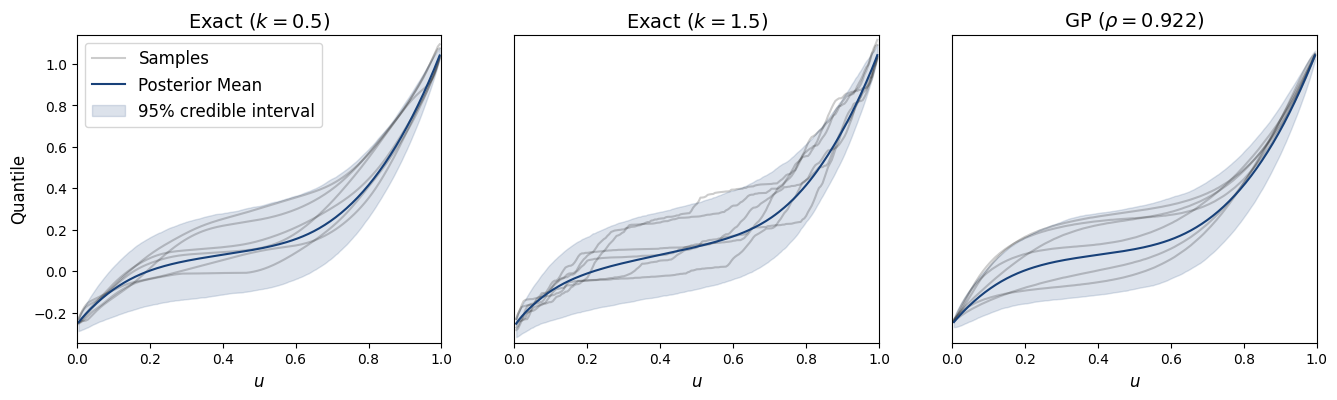

In [8]:
#Rearrange samples
Q_pr_rearr = rearrange_Q_B(Q_pr)
Q_pr2_rearr = rearrange_Q_B(Q_pr2)
Q_gp_rearr = rearrange_Q_B(Q_gp)
Q_gp_smooth_rearr = rearrange_Q_B(Q_gp_smooth)

#Make plots
f = plt.figure(figsize = (16,4))
plt.subplot(1,3,1)
plt.plot(u_plot,Q_pr_rearr[-1],color = 'k',alpha = 0.2,label = 'Samples')
for j in range(5):
    plt.plot(u_plot,Q_pr_rearr[j],color = 'k',alpha = 0.2)

plt.plot(u_plot,np.mean(Q_pr_rearr,axis = 0), color = c('1'),alpha = 1., label = 'Posterior Mean')
low = np.quantile(Q_pr_rearr,axis = 0, q = 0.025)
hi = np.quantile(Q_pr_rearr,axis= 0, q = 0.975)
plt.fill_between(u_plot,low, hi, alpha = 0.15,color = c('1'), label = '95% credible interval')
plt.legend(fontsize = 12)
plt.xlim(0,1)
plt.ylim(np.min(Q_truth)-0.1, np.max(Q_truth)+0.1)
plt.title(r'Exact ($k = 0.5$)',fontsize = 14)
plt.ylabel(r'Quantile',fontsize = 12)
plt.xlabel(r'$u$', fontsize = 12)

plt.subplot(1,3,2)
plt.yticks([], [])

plt.plot(u_plot,Q_pr2_rearr[-1],color = 'k',alpha = 0.2,label = 'Samples')
for j in range(5):
    plt.plot(u_plot,Q_pr2_rearr[j],color = 'k',alpha = 0.2)

plt.plot(u_plot,np.mean(Q_pr2_rearr,axis = 0), color = c('1'),alpha = 1., label = 'Posterior Mean')
low = np.quantile(Q_pr2_rearr,axis = 0, q = 0.025)
hi = np.quantile(Q_pr2_rearr,axis= 0, q = 0.975)
plt.fill_between(u_plot,low, hi, alpha = 0.15,color = c('1'), label = '95% credible interval')
plt.xlim(0,1)
plt.ylim(np.min(Q_truth)-0.1, np.max(Q_truth)+0.1)
plt.xlabel(r'$u$', fontsize = 12)
plt.title(r'Exact ($k = 1.5$)',fontsize = 14)

plt.subplot(1,3,3)

plt.plot(u_plot,Q_gp_smooth_rearr[-1],color = 'k',alpha = 0.2,label = 'Samples')
for j in range(5):
    plt.plot(u_plot,Q_gp_smooth_rearr[j],color = 'k',alpha = 0.2)
plt.plot(u_plot,np.mean(Q_gp_smooth_rearr,axis = 0), color = c('1'),alpha = 1., label = 'Posterior Mean')

low = np.quantile(Q_gp_smooth_rearr,axis = 0, q = 0.025)
hi = np.quantile(Q_gp_smooth_rearr,axis= 0, q = 0.975)
plt.fill_between(u_plot,low, hi, alpha = 0.15,color = c('1'), label = '95% credible interval')
plt.xlim(0,1)
plt.ylim(np.min(Q_truth)-0.1, np.max(Q_truth)+0.1)
plt.title(r'GP ($\rho = {0.922}$)',fontsize = 14)
plt.xlabel(r'$u$',fontsize = 12)
plt.yticks([], [])


f.savefig('bandwidth_rearr_3pane.pdf', bbox_inches='tight')


# Supplementary

## Functional learning rate plots

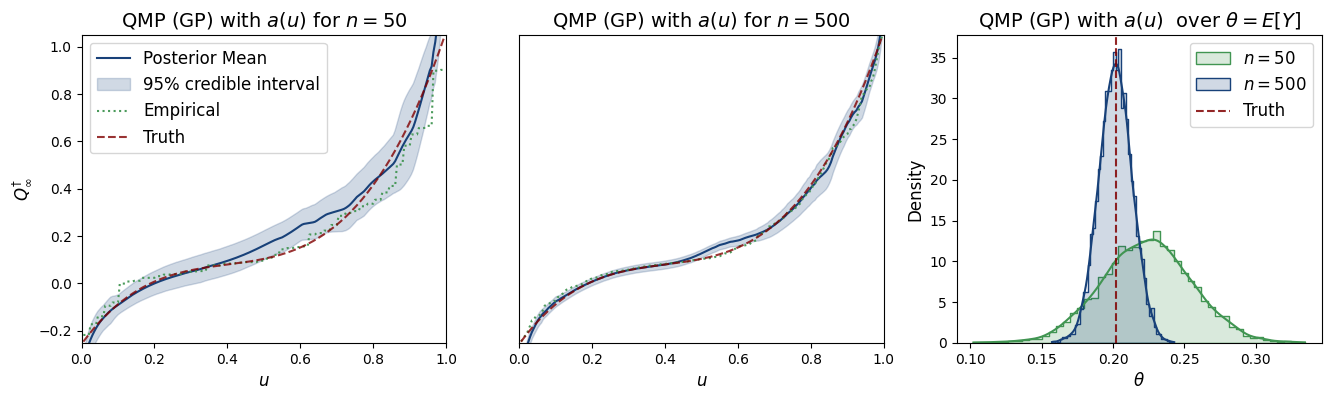

In [9]:
#Load references
u_plot = np.load('plot_data/u_plot.npy')
du = u_plot[1]- u_plot[0]
Q_truth = np.load("plot_data/Q_truth.npy")

f=plt.figure(figsize = (16,4))

plt.subplot(1,3,1)
#Load data
n = 50
Q_pr_gp_rearr = np.load("plot_data/Q_pr_gp_func_rearr_n{}.npy".format(n))
y = np.load('plot_data/y_n{}.npy'.format(n))

mean = np.mean(Q_pr_gp_rearr,axis = 0)
low = np.quantile(Q_pr_gp_rearr,axis = 0, q = 0.025)
hi = np.quantile(Q_pr_gp_rearr,axis= 0, q = 0.975)

plt.plot(u_plot,mean, color = c('1'),alpha = 1., label = 'Posterior Mean')
plt.fill_between(u_plot,low, hi, alpha = 0.2,color = c('1'), label = '95% credible interval')
sns.lineplot(x=u_plot, y= np.quantile(y,u_plot,method = 'inverted_cdf'),label = 'Empirical',color = c('3'), ls = ':', alpha = 0.95)
plt.plot(u_plot,Q_truth, color = 'maroon', label = 'Truth',alpha = 0.8, ls = '--')
plt.xlim(0,1)
plt.ylim(-0.25,1.05)
plt.title(r'QMP (GP) with $a(u)$ for $n=${}'.format(n),fontsize = 14)
plt.ylabel(r'$Q_\infty^{\dagger}$',fontsize = 12)
plt.xlabel(r'$u$', fontsize = 12)
plt.legend(fontsize = 12)

plt.subplot(1,3,2)
plt.yticks([], [])
#Load data
n = 500
Q_pr_gp_rearr = np.load("plot_data/Q_pr_gp_func_rearr_n{}.npy".format(n))
y = np.load('plot_data/y_n{}.npy'.format(n))

u_plot = np.load('plot_data/u_plot.npy')


mean = np.mean(Q_pr_gp_rearr,axis = 0)
low = np.quantile(Q_pr_gp_rearr,axis = 0, q = 0.025)
hi = np.quantile(Q_pr_gp_rearr,axis= 0, q = 0.975)

plt.plot(u_plot,mean, color = c('1'),alpha = 1.)
plt.fill_between(u_plot,low, hi, alpha = 0.2,color = c('1'))
sns.lineplot(x=u_plot, y= np.quantile(y,u_plot,method = 'inverted_cdf'),color = c('3'), ls = ':', alpha = 0.95)
plt.plot(u_plot,Q_truth, color = 'maroon', label = 'Truth',alpha = 0.8,ls = '--')
plt.xlim(0,1)
plt.ylim(-0.25,1.05)
plt.title(r'QMP (GP) with $a(u)$ for $n=${}'.format(n),fontsize = 14)
plt.xlabel(r'$u$', fontsize = 12)

plt.subplot(1,3,3)
n1 = 50
n2 = 500
Q_pr_gp_rearr_small = np.load("plot_data/Q_pr_gp_func_rearr_n{}.npy".format(n1))
Q_pr_gp_rearr_big = np.load("plot_data/Q_pr_gp_func_rearr_n{}.npy".format(n2))

mean_small = np.sum(Q_pr_gp_rearr_small,axis = 1)*du
mean_big = np.sum(Q_pr_gp_rearr_big,axis = 1)*du

sns.histplot(mean_small,label = r'$n =${}'.format(n1),alpha  = 0.2, stat = 'density', kde = True,element="step",color = c('3'))
sns.histplot(mean_big,label = r'$n =${}'.format(n2),alpha = 0.2, stat = 'density', kde = True,element="step",color = c('1'))
plt.axvline(np.sum(Q_truth)*du,label = 'Truth',color = 'maroon',alpha = 0.85, ls = '--')
plt.title(r'QMP (GP) with $a(u)$  over $\theta = E[Y]$',fontsize = 14)
plt.xlabel(r'$\theta$',fontsize = 12)
plt.ylabel('Density',fontsize = 12)
plt.legend(fontsize = 12)
f.savefig('sim_func.pdf', bbox_inches='tight')
